In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

## Read the training and test data sets previously split and stored as separage csv files
## The last column labelled '86' is the 0/1 label indicationg benign/malware for each sample row.

## We will split the training data into a set for actual training and a validation set.
## That way we can tune the model before doing a final evaluation with the test data set.
df_train_and_valid = pd.read_csv("data/train_data.csv")
df_test = pd.read_csv("data/test_data.csv")

df_train, df_valid = train_test_split(df_train_and_valid, test_size = 0.25, random_state=47)
num_columns = df_train.shape[1]
X_train = df_train.iloc[:,:num_columns-1]
y_train = df_train.iloc[:,num_columns-1]
X_valid = df_valid.iloc[:,:num_columns-1]
y_valid = df_valid.iloc[:,num_columns-1]
X_test = df_test.iloc[:,:num_columns-1]
y_test = df_test.iloc[:,num_columns-1]


In [33]:
def trainLR_Model(C=1.0):
    model = LogisticRegression ( tol=0.0001, C=C, max_iter=5000 )
    model.fit(X_train, y_train)
    return model

In [35]:
C = 10.0
model = trainLR_Model(C=C)
print(f'train.score = {model.score(X_train,y_train)} for C = {C}')
print(f'valid.score = {model.score(X_valid,y_valid)} for C = {C}')
print("\n")
C = 5.0
model = trainLR_Model(C=C)
print(f'train.score = {model.score(X_train,y_train)} for C = {C}')
print(f'valid.score = {model.score(X_valid,y_valid)} for C = {C}')
print("\n")
C = 1.0
model = trainLR_Model(C=C)
print(f'train.score = {model.score(X_train,y_train)} for C = {C}')
print(f'valid.score = {model.score(X_valid,y_valid)} for C = {C}')
print("\n")
C = 0.3
model = trainLR_Model(C=C)
print(f'train.score = {model.score(X_train,y_train)} for C = {C}')
print(f'valid.score = {model.score(X_valid,y_valid)} for C = {C}')
print("\n")
C = 0.1
model = trainLR_Model(C=C)
print(f'train.score = {model.score(X_train,y_train)} for C = {C}')
print(f'valid.score = {model.score(X_valid,y_valid)} for C = {C}')
print("\n")


train.score = 0.9996753035911423 for C = 10.0
valid.score = 0.9994155464640561 for C = 10.0


train.score = 0.9993506071822845 for C = 5.0
valid.score = 0.9988310929281122 for C = 5.0


train.score = 0.9994804857458276 for C = 1.0
valid.score = 0.9996103643093708 for C = 1.0


train.score = 0.9920774076238716 for C = 0.3
valid.score = 0.9924021040327294 for C = 0.3


train.score = 0.9864276901097474 for C = 0.1
valid.score = 0.9881161114358075 for C = 0.1




In [36]:
C = 5.0
model = trainLR_Model(C=C)
print(f'test.score = {model.score(X_test,y_test)} for C = {C}')


test.score = 0.9985227272727273 for C = 5.0


In [43]:
yp = model.predict(X_test)
print('acc', accuracy_score(y_test, yp))
print('recall', recall_score(y_test, yp))
print('precision', precision_score(y_test, yp))
print('F1', f1_score(y_test, yp))

acc 0.9985227272727273
recall 0.9984276729559748
precision 0.9986519883172321
F1 0.9985398180388633


In [44]:
pd.DataFrame(confusion_matrix(y_test,yp))

,0,1
0,4342,6
1,7,4445


Text(0.5, 0, 'recall')

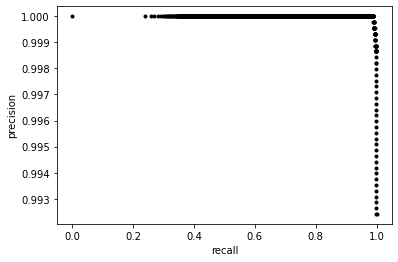

In [47]:
ypp = model.predict_proba(X_test)
pre, rec, th = precision_recall_curve(y_test, ypp[:,1])
plt.plot(rec,pre,'k.')
plt.ylabel('precision')
plt.xlabel('recall')

Text(0.7, 0.2, 'AUC=1.000')

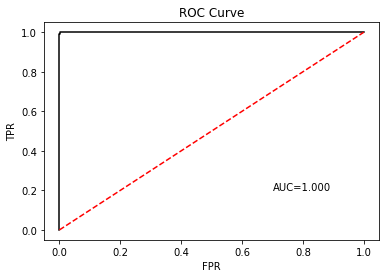

In [51]:
fpr, tpr, th = roc_curve(y_test, ypp[:,1])
auc = roc_auc_score(y_test, ypp[:,1])
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'k-')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0.7, 0.2, 'AUC='+"{:.3f}".format(auc))